<a href="https://colab.research.google.com/github/akshita119/imgCompressor/blob/main/imgCompressionS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# find closest centroids
def find_closest_centroids(X, centroids):
  idx = []
  for i,x in enumerate(X):
    minCost = float('inf')
    c = -1
    for j, centre in enumerate(centroids):
      dis = 0
      for k in range(len(centre)):
        q = (x[k]- centre[k])**2
        dis += q
      if dis < minCost:
        c = j
        minCost = dis
    idx.append(c)
  return idx

In [ ]:
#Computing centroid means
def compute_centroids(X, idx, K):
  centroids = np.zeros((K, X.shape[1]), dtype=float)
  cnt = np.zeros(K)

  for i in range(len(X)):
    centroids[idx[i]] += X[i]
    cnt[idx[i]] += 1

  for i in range(K):
    centroids[i] = centroids[i]/cnt[i] if cnt[i] > 0 else centroids[i]
  return centroids
# def compute_centroids(X, idx, K):
#       m, n = X.shape
#       idx = np.array(idx)
#       centroids = np.zeros((K, n), dtype=np.float64)

#       for k in range(K):
#           points = X[idx == k]
#           if points.shape[0] > 0:  # Avoid empty cluster issue
#             centroids[k] = np.mean(points, axis=0)


#       return centroids

In [ ]:
# kMeans



def kMeans_algo(X, initial_centroids, max_iters):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids.copy()
    previous_centroids = np.zeros_like(centroids)
    idx = np.zeros(m, dtype=int)
    iteration = 0

    while not np.allclose(centroids, previous_centroids) and iteration < max_iters:
        # closest centroids
        idx = find_closest_centroids(X, centroids)

        # save the current centroids for convergence check
        previous_centroids = centroids.copy()

        # new centroids
        centroids = compute_centroids(X, idx, K)

        iteration += 1

    return centroids, idx




In [ ]:
#random initialisation

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [ ]:
# # compute square error cost
# def compute_cost(X, idx, centroids):
#   cost = 0
#   for i in range(len(X)):
#     distance = np.linalg.norm(X[i] - centroids[idx[i]]) ** 2
#     cost += distance

#   return cost
def compute_cost(X, idx, centroids):
    cost = np.sum((X - centroids[idx]) ** 2)  # Vectorized computation
    return cost


In [ ]:
# run 10 times
def run_KMeans(X, K):
  cost = np.inf

  optimal_centroids = None
  optimal_idx = None

  for i in range(2):
    random_centroids = kMeans_init_centroids(X, K)
    centroids, idx = kMeans_algo(X, random_centroids, 10)
    new_cost = compute_cost(X, idx, centroids)
    if new_cost < cost:
      cost = new_cost
      optimal_centroids = centroids
      optimal_idx = idx


  return optimal_centroids, optimal_idx


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


def compress_image(image, K=16, max_iters=10, num_runs=100):
    # flatten
    m, n, c = image.shape
    X = image.reshape(m * n, c).astype(np.float64)  # Ensure correct type

    #  K-Means
    centroids, idx = run_KMeans(X, K)
    idx = np.array(idx)  # Ensure idx is a NumPy array

    #centroids to uint8
    compressed_image = centroids[idx].reshape(m, n, c).astype(np.uint8)

    return compressed_image, centroids




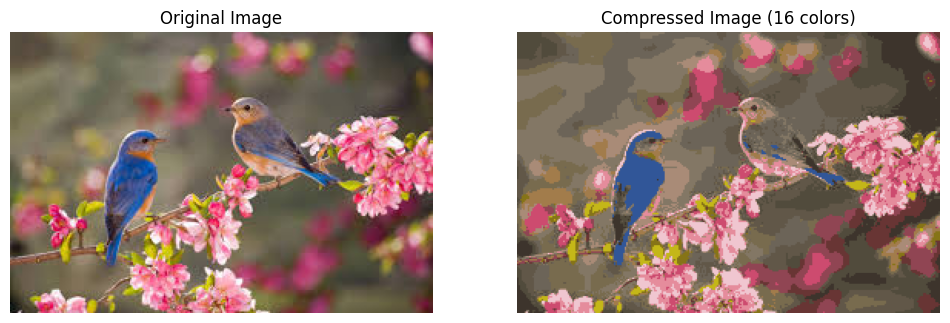

In [ ]:


# load the image
image = io.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROsr3T9x0DS-sZ2_UcohTatqiDZEpYcefksg&s')
# image = io.imread('apple.jpg')


# display original and compressed image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Compress the image to 16 colors
compressed_image, centroids = compress_image(image, K=16, max_iters = 10, num_runs = 100)

ax[1].imshow(compressed_image)
ax[1].set_title("Compressed Image (16 colors)")
ax[1].axis('off')

plt.show()


In [ ]:
print(f"X.shape[0], X.shape[1]")

X.shape[0], X.shape[1]
